In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [7]:
df.shape

(891, 15)

In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(107)

In [10]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df
'
'

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
df.alive.value_counts()

alive
no     461
yes    323
Name: count, dtype: int64

In [16]:
df.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [22]:
df.drop(columns=['survived','pclass','embarked','deck','adult_male'],axis=1,inplace=True)

In [21]:
df.sex.unique()

array(['male', 'female'], dtype=object)

In [25]:
df.rename(columns={'sex':'gender'},inplace=True)

In [28]:
df.drop(columns='sibsp',inplace=True)

In [29]:
df

,gender,age,parch,fare,class,who,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,man,Southampton,no,False
1,female,38.0,0,71.2833,First,woman,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,woman,Southampton,yes,True
3,female,35.0,0,53.1000,First,woman,Southampton,yes,False
4,male,35.0,0,8.0500,Third,man,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
885,female,39.0,5,29.1250,Third,woman,Queenstown,no,False
887,female,19.0,0,30.0000,First,woman,Southampton,yes,True
888,female,NaN,2,23.4500,Third,woman,Southampton,no,False
889,male,26.0,0,30.0000,First,man,Cherbourg,yes,True


In [31]:
df.isnull().sum()

gender           0
age            106
parch            0
fare             0
class            0
who              0
embark_town      2
alive            0
alone            0
dtype: int64

<Axes: ylabel='age'>

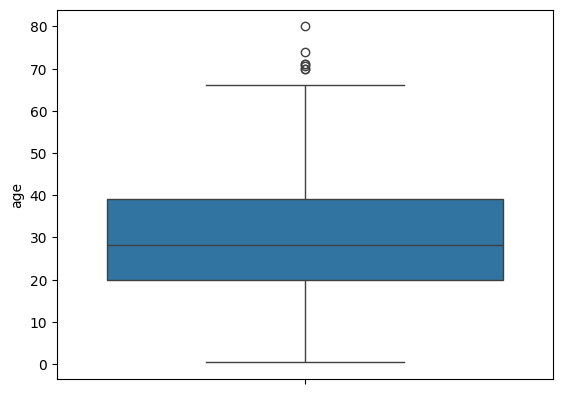

In [33]:
sns.boxplot(df['age'])

In [34]:
df['embark_town']

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
885     Queenstown
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 784, dtype: object

In [36]:
df.fillna({'embark_town':df.embark_town.mode()[0],'age':df.age.median()},inplace=True)

In [37]:
df

,gender,age,parch,fare,class,who,embark_town,alive,alone
0,male,22.00,0,7.2500,Third,man,Southampton,no,False
1,female,38.00,0,71.2833,First,woman,Cherbourg,yes,False
2,female,26.00,0,7.9250,Third,woman,Southampton,yes,True
3,female,35.00,0,53.1000,First,woman,Southampton,yes,False
4,male,35.00,0,8.0500,Third,man,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
885,female,39.00,5,29.1250,Third,woman,Queenstown,no,False
887,female,19.00,0,30.0000,First,woman,Southampton,yes,True
888,female,28.25,2,23.4500,Third,woman,Southampton,no,False
889,male,26.00,0,30.0000,First,man,Cherbourg,yes,True


In [40]:
x=df.gender.value_counts().index

In [43]:
y=df.gender.value_counts().values

In [67]:
df.gender.value_counts()

gender
male      491
female    293
Name: count, dtype: int64

In [44]:
x

Index(['male', 'female'], dtype='object', name='gender')

In [45]:
y

array([491, 293])

In [57]:
import warnings
warnings.filterwarnings('ignore')

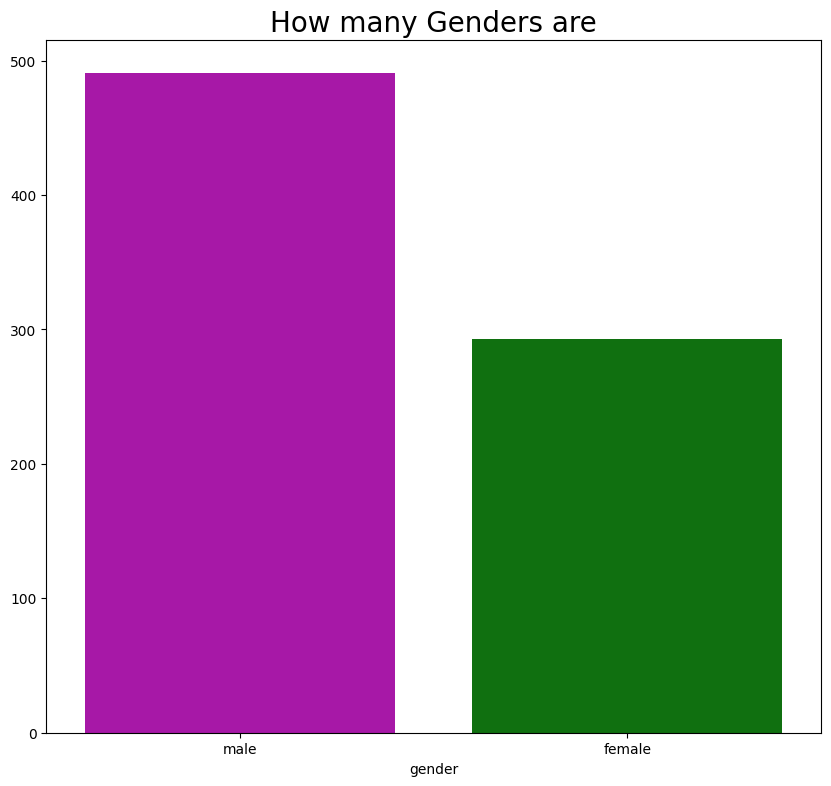

In [59]:
plt.figure(figsize=(10,9))
plt.title('How many Genders are',fontdict={'fontsize':20})
sns.barplot(x=x,y=y,palette=['m','g'])
plt.show()

In [63]:
df['class'].value_counts().values

array([405, 214, 165])

In [68]:
df['class'].value_counts()

class
Third     405
First     214
Second    165
Name: count, dtype: int64

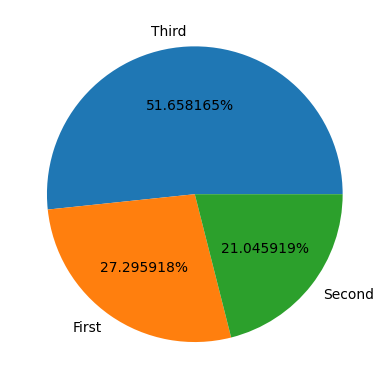

In [71]:
plt.pie(x=df['class'].value_counts().values,labels=df['class'].value_counts().index,autopct='%f%%')
plt.show()

In [73]:
df.alive.value_counts().vb

alive
no     461
yes    323
Name: count, dtype: int64

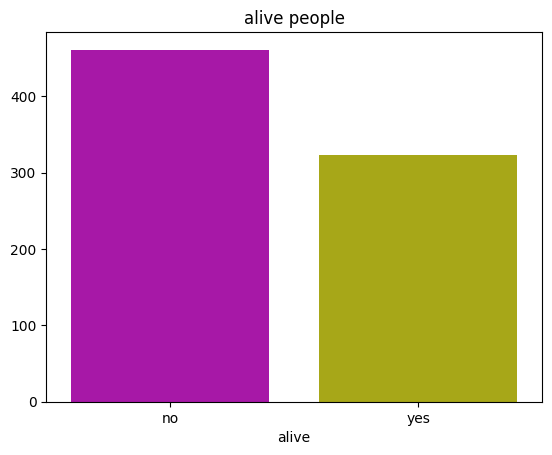

In [79]:
plt.title('alive people')
sns.barplot(x=df.alive.value_counts().index,y=df.alive.value_counts().values,palette=['m','y'])
plt.show()

In [82]:
df.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [83]:
df.embark_town.value_counts()

embark_town
Southampton    570
Cherbourg      155
Queenstown      59
Name: count, dtype: int64

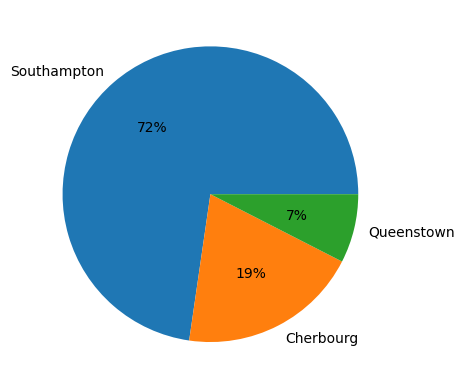

In [86]:
plt.pie(x=df.embark_town.value_counts().values,labels=df.embark_town.value_counts().index,autopct='%i%%')
plt.show()

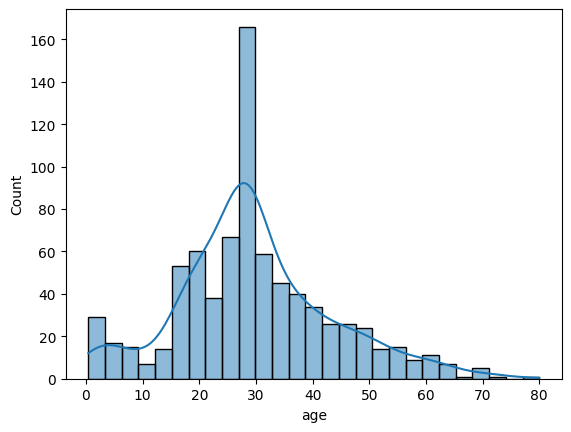

In [89]:
sns.histplot(df.age,kde=True)
plt.show()

<Axes: xlabel='fare', ylabel='Count'>

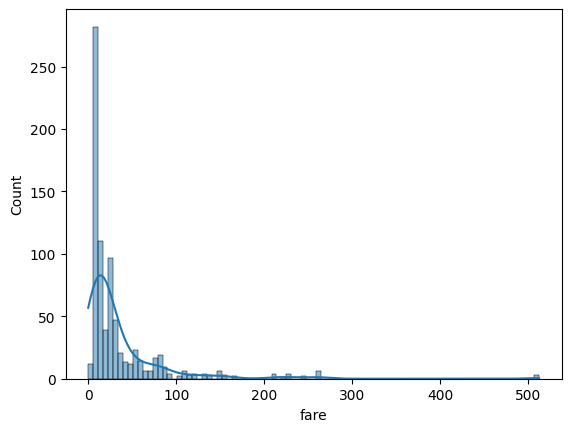

In [91]:
sns.histplot(df.fare,kde=True)

In [92]:
df

,gender,age,parch,fare,class,who,embark_town,alive,alone
0,male,22.00,0,7.2500,Third,man,Southampton,no,False
1,female,38.00,0,71.2833,First,woman,Cherbourg,yes,False
2,female,26.00,0,7.9250,Third,woman,Southampton,yes,True
3,female,35.00,0,53.1000,First,woman,Southampton,yes,False
4,male,35.00,0,8.0500,Third,man,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
885,female,39.00,5,29.1250,Third,woman,Queenstown,no,False
887,female,19.00,0,30.0000,First,woman,Southampton,yes,True
888,female,28.25,2,23.4500,Third,woman,Southampton,no,False
889,male,26.00,0,30.0000,First,man,Cherbourg,yes,True


In [94]:
male=df[df.gender == 'male']

In [95]:
female=df[df.gender == 'female']

In [96]:
male

,gender,age,parch,fare,class,who,embark_town,alive,alone
0,male,22.00,0,7.2500,Third,man,Southampton,no,False
4,male,35.00,0,8.0500,Third,man,Southampton,no,True
5,male,28.25,0,8.4583,Third,man,Queenstown,no,True
6,male,54.00,0,51.8625,First,man,Southampton,no,True
7,male,2.00,1,21.0750,Third,child,Southampton,no,False
...,...,...,...,...,...,...,...,...,...
876,male,20.00,0,9.8458,Third,man,Southampton,no,True
881,male,33.00,0,7.8958,Third,man,Southampton,no,True
883,male,28.00,0,10.5000,Second,man,Southampton,no,True
889,male,26.00,0,30.0000,First,man,Cherbourg,yes,True


In [97]:
female

,gender,age,parch,fare,class,who,embark_town,alive,alone
1,female,38.00,0,71.2833,First,woman,Cherbourg,yes,False
2,female,26.00,0,7.9250,Third,woman,Southampton,yes,True
3,female,35.00,0,53.1000,First,woman,Southampton,yes,False
8,female,27.00,2,11.1333,Third,woman,Southampton,yes,False
9,female,14.00,0,30.0708,Second,child,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...
880,female,25.00,1,26.0000,Second,woman,Southampton,yes,False
882,female,22.00,0,10.5167,Third,woman,Southampton,no,True
885,female,39.00,5,29.1250,Third,woman,Queenstown,no,False
887,female,19.00,0,30.0000,First,woman,Southampton,yes,True


In [98]:
male.alive.value_counts()

alive
no     385
yes    106
Name: count, dtype: int64

<Axes: xlabel='alive'>

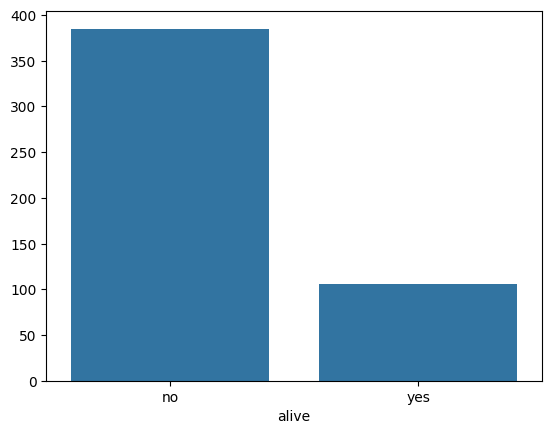

In [100]:
sns.barplot(x=male.alive.value_counts().index,y=male.alive.value_counts().values)

<Axes: xlabel='alive'>

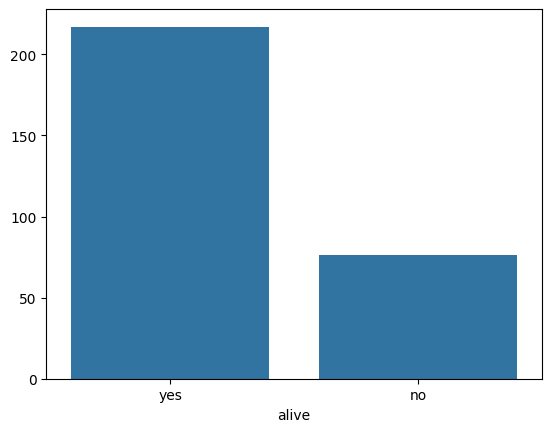

In [101]:
sns.barplot(x=female.alive.value_counts().index,y=female.alive.value_counts().values)

In [106]:
df

,gender,age,parch,fare,class,who,embark_town,alive,alone
0,male,22.00,0,7.2500,Third,man,Southampton,no,False
1,female,38.00,0,71.2833,First,woman,Cherbourg,yes,False
2,female,26.00,0,7.9250,Third,woman,Southampton,yes,True
3,female,35.00,0,53.1000,First,woman,Southampton,yes,False
4,male,35.00,0,8.0500,Third,man,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
885,female,39.00,5,29.1250,Third,woman,Queenstown,no,False
887,female,19.00,0,30.0000,First,woman,Southampton,yes,True
888,female,28.25,2,23.4500,Third,woman,Southampton,no,False
889,male,26.00,0,30.0000,First,man,Cherbourg,yes,True


<Axes: xlabel='embark_town', ylabel='count'>

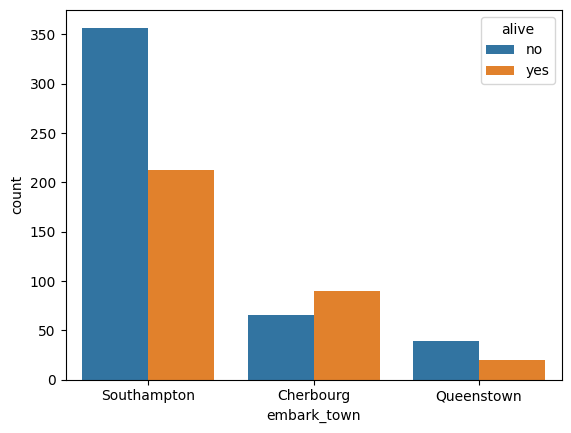

In [116]:
sns.countplot(data=df,x='embark_town',hue='alive')

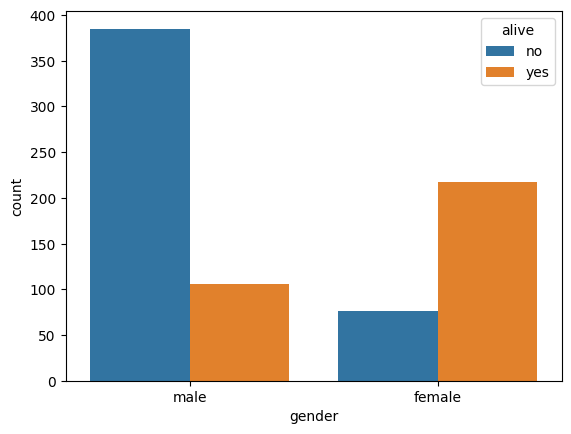

In [118]:
sns.countplot(data=df,x='gender',hue='alive')
plt.show()

In [124]:
group=df.groupby(by='gender')

In [126]:
group.get_group('male').age.mean()

np.float64(30.644439918533607)

In [127]:
group.get_group('female').shape

(293, 9)

In [128]:
group.get_group('male').shape

(491, 9)

In [129]:
df

,gender,age,parch,fare,class,who,embark_town,alive,alone
0,male,22.00,0,7.2500,Third,man,Southampton,no,False
1,female,38.00,0,71.2833,First,woman,Cherbourg,yes,False
2,female,26.00,0,7.9250,Third,woman,Southampton,yes,True
3,female,35.00,0,53.1000,First,woman,Southampton,yes,False
4,male,35.00,0,8.0500,Third,man,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
885,female,39.00,5,29.1250,Third,woman,Queenstown,no,False
887,female,19.00,0,30.0000,First,woman,Southampton,yes,True
888,female,28.25,2,23.4500,Third,woman,Southampton,no,False
889,male,26.00,0,30.0000,First,man,Cherbourg,yes,True


In [135]:
df.groupby(by=['gender','alive']).get_group(('female','no'))

,gender,age,parch,fare,class,who,embark_town,alive,alone
14,female,14.00,0,7.8542,Third,child,Southampton,no,True
18,female,31.00,0,18.0000,Third,woman,Southampton,no,False
24,female,8.00,1,21.0750,Third,child,Southampton,no,False
38,female,18.00,0,18.0000,Third,woman,Southampton,no,False
40,female,40.00,0,9.4750,Third,woman,Southampton,no,False
...,...,...,...,...,...,...,...,...,...
852,female,9.00,1,15.2458,Third,child,Cherbourg,no,False
854,female,44.00,0,26.0000,Second,woman,Southampton,no,False
882,female,22.00,0,10.5167,Third,woman,Southampton,no,True
885,female,39.00,5,29.1250,Third,woman,Queenstown,no,False


In [137]:
df.groupby('gender').get_group('male')

,gender,age,parch,fare,class,who,embark_town,alive,alone
0,male,22.00,0,7.2500,Third,man,Southampton,no,False
4,male,35.00,0,8.0500,Third,man,Southampton,no,True
5,male,28.25,0,8.4583,Third,man,Queenstown,no,True
6,male,54.00,0,51.8625,First,man,Southampton,no,True
7,male,2.00,1,21.0750,Third,child,Southampton,no,False
...,...,...,...,...,...,...,...,...,...
876,male,20.00,0,9.8458,Third,man,Southampton,no,True
881,male,33.00,0,7.8958,Third,man,Southampton,no,True
883,male,28.00,0,10.5000,Second,man,Southampton,no,True
889,male,26.00,0,30.0000,First,man,Cherbourg,yes,True
